#  Homework 1
## k-NN Regression, Linear Regression, and Multilinear Regression

**Summer 2019**<br/>
**Instructor**: Pavlos Protopapas
**Homework prepared by:** David Sondak and Andrea Porelli

---

### INSTRUCTIONS

- Submisson instructions:
  - Submit your Jupyter notebook to the teaching staff in an email.
  - The email should have the following subject:  gec-summer-2019 HW 1 "Your Name"
    - e.g. gec-summer2019 HW1 David Sondak
    
    **Homeworks with the wrong subject line will recieve a 0.**
  - The due date is **Friday, August 2nd at 11:59 PM EDT**.  Please note the time-zone! (EDT stands for Eastern Daylight Time).
    **No late days!**

- **Restart the kernel and run the whole notebook again before you submit.**

#### Suggestion
Before starting your homework, you may want to consider making a copy of the problem statement.  For example, you can copy `hw1.ipynb` to `hw1_working.ipynb` and then do all of your work in `hw1_working.ipynb`.  When you're ready to submit, make another copy (maybe call it `hw1_final_Group#.ipynb` where # is replaced with your group number) and make sure it runs.  Following these steps will help minimize mistakes.

---

##### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.api import OLS
import scipy as sp
%matplotlib inline
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
#sets up styles and gives us more plotting options

# Part 1 [26 pts]:  k-NN and Linear Regression
## Problem Description:  Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

## 1.1 [3pts]:  Exploratory Data Analysis (EDA)

### 1.1.1 [2 pts]
Generate a scatter plot of the training data points with the time of the day on the $X$-axis and the number of taxi pickups on the $Y$-axis. 

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
* [2 pts] The scatter plot with clear labels on the $x$ and $y$ axes.

In [6]:
dftaxi=pd.read_csv("dataset_1_train.txt")
dftaxi_t=pd.read_csv("dataset_1_test.txt")

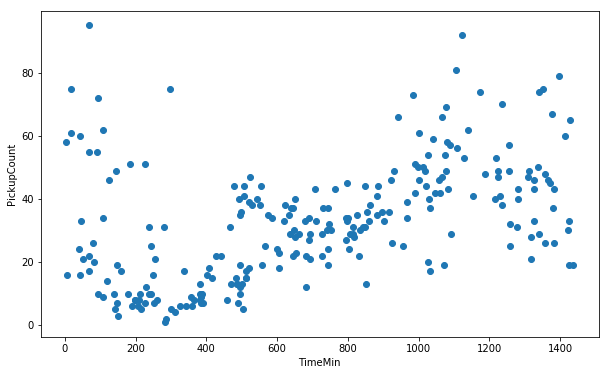

In [7]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.scatter(dftaxi.TimeMin, dftaxi.PickupCount)
plt.xlabel("TimeMin")
plt.ylabel("PickupCount")
plt.show()

### 1.1.2 [1 pt]:  Discuss your results

* Does the pattern of taxi pickups make intuitive sense to you?

   * Answer：During the TimeMin interval from 400 to 1000, the PickupCount is approximately in direct proportion to TimeMin, but outside this interval, there isn't intuitive relation between PickupCount and TimeMin.
   

## 1.2 [12 pts]: k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression.

### 1.2.1 [6pts]
Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200).

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.
##### Hints:
* Normalize the `TimeMin` predictor to a value between $0$ and $1$. This can be done by dividing the time column in the training and test sets by $1440$ (i.e. the number of minutes in a day, which is the maximum value the predictor can take). Although not required for this homework, this normalization step would be particularly helpful while fitting polynomial regression models on this data.
* Sort the $x$ values before making your plots.

#### Required Outputs
* [2 pts] Make a scatter plot of `pickup counts` vs. `Time` for each $k$.  Each figure should have plots of the prediction from the k-NN regression and the actual values on the same figure.  Each figure must have appropriate axis labels, title, and legend.
* [1 pt] Report the $R^2$ score for the fitted models on both the training and test sets.
* [3 pts] Plot the training and test $R^2$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.

In [8]:
#step 1---cleaning data "TimeMin"
TimeMin=dftaxi['TimeMin']
TimeMin_is_null=pd.isnull(TimeMin)#pan duan mou zhi shi fou shi que shi zhi !xian shi true huozhe false
taxi=dftaxi[TimeMin_is_null==False] 
# Thus, there are only 250 samples left

TimeMin_t=dftaxi_t['TimeMin']
TimeMin_t_is_null=pd.isnull(TimeMin_t)
taxi_t=dftaxi_t[TimeMin_t_is_null==False] 


#step 2---Normalize the TimeMin predictor to a value between  0 and 1
taxi['TimeMin'] = taxi['TimeMin'].apply(lambda x: x/1440)
taxi_t['TimeMin']= taxi_t['TimeMin'].apply(lambda x: x/1440)

In [9]:
#1.2.1 [6pts]
#Fit a k-NN regression model to the training set for different values of  k
#(e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200).
length_dataframe=taxi.shape[0]
xtrain = taxi.TimeMin.values
ytrain = taxi.PickupCount.values
Xtrain = xtrain.reshape(xtrain.shape[0], 1)
from sklearn.neighbors import KNeighborsRegressor
regdict = {}
from sklearn.metrics import mean_squared_error
for k in [1, 2, 10, 25, 50,100,200,250]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain,ytrain)
    regdict[k] = knnreg
    knnreg.fit(Xtrain, ytrain)
    r2 = knnreg.score(Xtrain,ytrain)
    r2
    print(r2)

0.8108889086047287
0.6454040692744734
0.45770521849580365
0.4194670658749883
0.35325229524195634
0.2870278573586439
0.10863100988399976
0.0


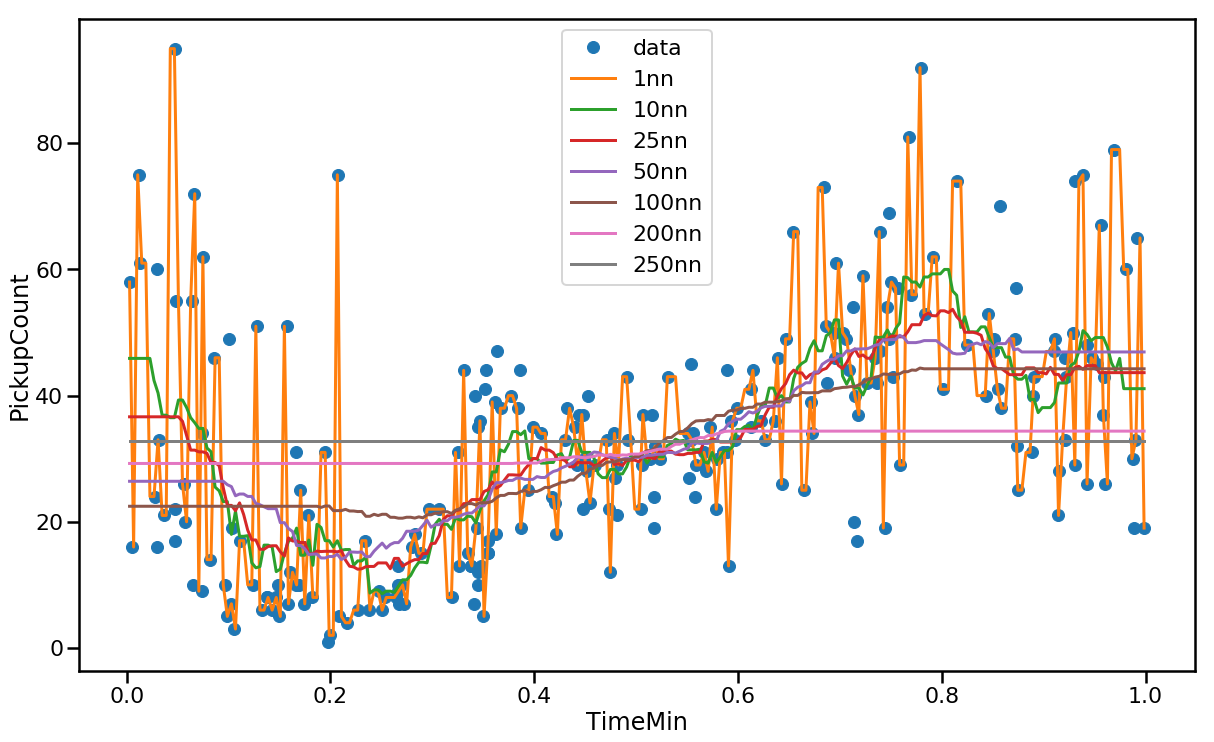

In [10]:
with sns.plotting_context('poster'):
    ax=plt.subplots(1,1,figsize=(20,12))
    plt.xlabel("TimeMin")
    plt.ylabel("PickupCount")
    plt.plot(taxi.TimeMin, taxi.PickupCount, 'o', label="data")
    xgrid = np.linspace(np.min(taxi.TimeMin), np.max(taxi.TimeMin), 250)
    for k in [1, 2, 10, 25, 50,100,200,250]:
        predictions = regdict[k].predict(xgrid.reshape(250,1))
        if k in [1,10,25,50,100,200,250]:
            plt.plot(xgrid, predictions, label="{}nn".format(k))
    plt.legend();

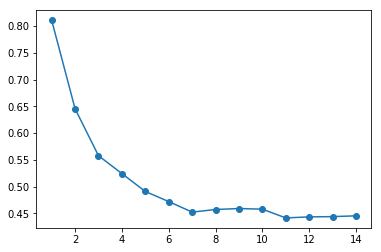

In [11]:
ks = range(1, 15)
scores_train = []
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain, ytrain)
    score_train = knnreg.score(Xtrain, ytrain)
    scores_train.append(score_train)
plt.plot(ks, scores_train,'o-');

### 1.2.2 [6 pts]:  Discuss your results
Discuss your results by answering the following questions.  You should answer the questions directly in this cell of your notebook right after each question.
1. [1 pt] How does the value of $k$ affect the fitted model?

   * In my opinion, KNN is one of the simplest idea of classification. And base on those groups, this regression indicate that nearest samples should share similar properties. Thus, in order to take all k-Nearest Neighbor in to consideration, averaging can be used to predict the result.
   
     Therefore, the larger the k is, the prediction take more sample into consideration. However, it doesn’t means the more sample it use, the better the prediction result is. 
     
     In extreme case, if data are random data samples, using KNN is unreasonable.
     
     If k is over large, it will confuse the distinction between the two group, making the classification imprecise. It just like assuming whether you are hungry is only relates to how much you have eaten within three hours. If you also consider the food intake four hours ago, the answer definitely different. 
     
     If k is too small, that means we don’t consider all the affections, which also lead to the inaccurate result. Still using the example above. If we only consider total intake within two hours, the result will also change. 
     
     I think the performance of k depends on the properties of data sample. Their relation with Nearest Neighbors decides which k is fittest. 


2. [1 pt] If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
  
   * K=n denotes we consider all samples within data set to make prediction at each data point. Thus, prediction value remains unchanged when data point change.
   
     Under the eating prediction explanation, we consider 24 data point (24 hours in a day). Using KNN regression and k=n, thus, our prediction result of how much we’d like to eat at every data point is equal to the average amount of total intake within a certain day.
  
  
3. [1 pt] Are some of the calculated $R^2$ values negative? If so, what does this indicate?

   * Negative R^2 means that the prediction result is worse than average of all values. Maybe in reality, our schedule is to eat 30% at 7am, 40% at 12 am and 30% at 6am. But if prediction result is eat 100% and 12 pm in the evening, this model must worse than assuming eating 1/24 of total intake at each point. .
  
  
4. [1 pt] What does an $R^2$ score of $0$ mean?

   * According to the definition of R^2, when a model’s R^2=0, this model is as good as mean value model (k=n under KNN regression) under this criteria of measure the good or bad of model. I want to mention that “as good as” doesn’t means each prediction point is equal to the prediction result of mean value model. It just means the sum of each point’s square of bias are equal to mean value model’s.
  
  
5. [1 pt] Do the training and test $R^2$ plots exhibit different trends?  Describe.

   * They have almost same trends. That because also sample point are in different sheet, they are come from the same system, thus, working and organizing in same way. As long as a data set is split into test set and train set randomly, both of them are from a same population. Although we may can’t figure out how this system work exactly, but our models won’t have scores that have too much differences under each data set.
  
  
6. [1 pt] Explain how the value of $k$ influences the training and test $R^2$ values. 
   * K denotes how much nearest samples will influence the prediction result. The larger the k is, the more smooth prediction curve will be. This can be interpreted as prediction results will more analogues with sample values when using more values from data set.

---

## 1.3 [11 pts]: Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor.

Use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of $1$s to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

### 1.3.1 [6 pts]:  Fit a linear regression model to the training set.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
* [1 pt] Report the $R^{2}$ score from the training and test sets.  You may notice something peculiar about how they compare.
* [1 pt] Report the slope and intercept values for the fitted linear model.
* [1 pt] Calculate and report the $95\%$ confidence interval for the slope and intercept.
* [3 pts] Plot the residuals $e = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.

In [404]:
#1.3.1 [6 pts]: Fit a linear regression model to the training set.

xtrain=taxi.TimeMin.values
ytrain=taxi.PickupCount.values
Xtrain = xtrain.reshape(xtrain.shape[0], 1)
#create linear model
regression = LinearRegression()
regression.fit(Xtrain, ytrain)
predicted_y = regression.predict(Xtrain)

r2 = regression.score(Xtrain, ytrain)
r2

0.2072137520989403

In [23]:
slope=regression.coef_
slope

array([34.28512531])

In [20]:
intercept=regression.intercept_
intercept

16.61159694929771

In [24]:
xtest=taxi_t.TimeMin.values
ytest=taxi_t.PickupCount.values
Xtest= xtest.reshape(xtest.shape[0], 1)
#create linear model
regression_test = LinearRegression()
regression_test.fit(Xtest, ytest)
predicted_y_test= regression.predict(Xtest)

r2t = regression.score(Xtest, ytest)
r2t

0.25191276539703167

In [27]:
slope_t=regression_test.coef_
slope_t

array([34.28512531])

In [28]:
intercept_t=regression_test.intercept_
intercept_t

16.61159694929771

In [13]:
model = sm.OLS(ytrain, Xtrain)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     728.0
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           7.15e-76
Time:                        14:13:58   Log-Likelihood:                -1092.1
No. Observations:                 250   AIC:                             2186.
Df Residuals:                     249   BIC:                             2190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            57.9262      2.147     26.981      0.000      53.698      62.155
==============================================================================
Omnibus:                       75.182   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.015
Skew:                           1.342   Prob(JB):                     5.00e-45
Kurtosis:                       6.519   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print("95% confident interval =[ 53.698,  62.155 ]")

95% confident interval =[ 53.698,  62.155 ]


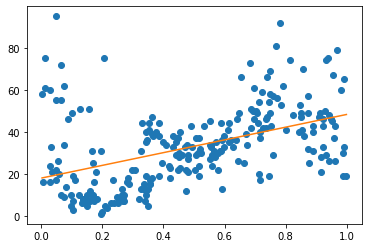

In [406]:
plt.plot(Xtrain,ytrain, 'o')
xgrid = np.linspace(np.min(taxi.TimeMin), np.max(taxi.TimeMin), 100)
plt.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))
plt.show()

### 1.3.2 [5 pts]: Discuss your results by answering the following questions.  
You should answer the questions directly in this cell of your notebook right after each question.
1. [1 pt] How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?

   * The answer of linear regression  $R^2$ score is larger than the best KNN regression $R^2$ value obtained with k-NN regression
   
  
2. [1 pt] What does the sign of the slope of the fitted linear model convey about the data?
  
   * It denotes the relation between PickupCount and TimeMin. In our coding results, shown as "coef", the slope of the fitted linear model is about 58. This can be interpretted as that once TimeMin increase 1, PickupCount will increase about 58
   
  
3. [1 pt] Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?

   * In my result, the coefficient locates right in the 95% interval. Thus, I think the parameters is reliable.
   
  
4. [1 pt] Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.

   * I think 99% percent interval for the slope and intercept will be more looser than 95% confidence intervals. To contain more possible value within certain interval, the interval need to be much more wider. Still using the eating example above. If we want to conclude the 95% percent confidence interval of exact eating time is about 12am, the answer may be from 6am into 9pm. However, if it's 99% percent confidence interval, the answer may be from 0o'clock in midnight to 11:59 in the evening. 
   
  
5. [1 pt] Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.

  *Your answer here.*

# Part 2 [21 pts]: Multilinear Regression
## Problem Description:Forecasting Bike Sharing Usage

In this part of the homework, we will focus on multiple linear regression.  The specific task is to build a regression model for a bike share system that can predict the total number of bike rentals in a given day based on attributes about the day. Such a demand forecasting model would be useful in planning the number of bikes that need to be available in the system on any given day and also in monitoring traffic in the city. The data for this problem was collected from the Capital Bikeshare program in Washington D.C. over two years.   

The data set is provided in the files `Bikeshare_train.csv` and `Bikeshare_test.csv`, as separate training and test sets. Each row in these files contains $10$ attributes describing a day and its weather:
- season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
- month (1 through 12, with 1 denoting Jan)
- holiday (1 = the day is a holiday, 0 = otherwise)
- day_of_week (0 through 6, with 0 denoting Sunday)
- workingday (1 = the day is neither a holiday or weekend, 0 = otherwise)
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp (temperature in Celsius)
- atemp (apparent temperature, or relative outdoor temperature, in Celsius)
- humidity (relative humidity)
- windspeed (wind speed)

and the last column 'count' contains the response variable, i.e. total number of bike rentals for the day.

You will fit a linear regression model and analyze its coefficients and residuals.  

In [407]:
dfbike_train = pd.read_csv("Bikeshare_train.csv")
dfbike_test = pd.read_csv("Bikeshare_test.csv")
dfbike_train = dfbike_train.rename(columns={"count":"TotalCount"})
dfbike_test = dfbike_test.rename(columns={"count":"TotalCount"})

## 2.1 [2 pts]: Exploratory Data Analysis (EDA)

As a first step, identify important characteristics of the data using suitable visualizations when necessary. Some of the questions you may ask include (but are not limited to):

- How does the number of bike rentals vary between weekdays and weekends? 
- How about bike rentals on holidays?
- What effect does the season have on the bike rentals on a given day?
- Is the number of bike rentals lower than average when there is rain or snow?
- How does temperature effect bike rentals?
- Do any of the numeric attributes have a clear non-linear dependence with number of the bike rentals?

**Note:  You are not required to answer all of the suggested questions.  You should answer *at least* three of them.  You are also encouraged to formulate and answer your own questions.  This part is deliberately open-ended to force you to think about data in the right way.**


### 1. How does the number of bike rentals vary between weekdays and weekends?
  * From the Boxplot, comparing their mean and max and min, I think there is no difference.

In [408]:
dfweekday = dfbike_train[['TotalCount','day_of_week']][(dfbike_train.day_of_week>0)&(dfbike_train.day_of_week<6)]
dfweekend = dfbike_train[['TotalCount','day_of_week']][(dfbike_train.day_of_week==0)|(dfbike_train.day_of_week==6)]
data = {
    "weekday":dfweekday.TotalCount,
    "weekend":dfweekend.TotalCount
}
df = pd.DataFrame(data)

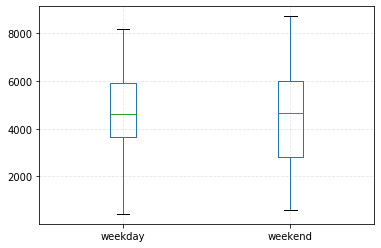

In [409]:
df.plot.box() 
plt.grid(linestyle="--", alpha=0.3)
plt.show()

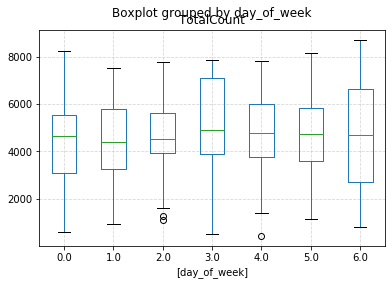

In [410]:
dfday_of_week = dfbike_train[['day_of_week','TotalCount']]
dfday_of_week.boxplot(by = 'day_of_week')
plt.grid(linestyle="--", alpha=0.5)
plt.show()

### 3.What effect does the season have on the bike rentals on a given day?
 * The rentals are higher in Summer and Fall, and in Spring the rentals ars much lower.

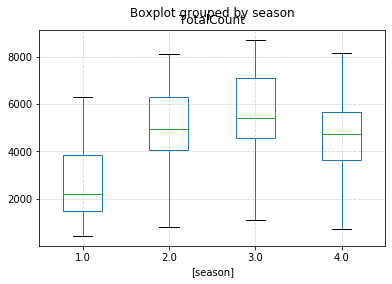

In [411]:
dfseason = dfbike_train[['season','TotalCount']]
dfseason.boxplot(by = 'season')
plt.grid(linestyle="--", alpha=0.5)
plt.show()

### 5.How does temperature effect bike rentals?
 * If the temperatur is pleasure, from about 20 to 25, more people would like to rent a bike.

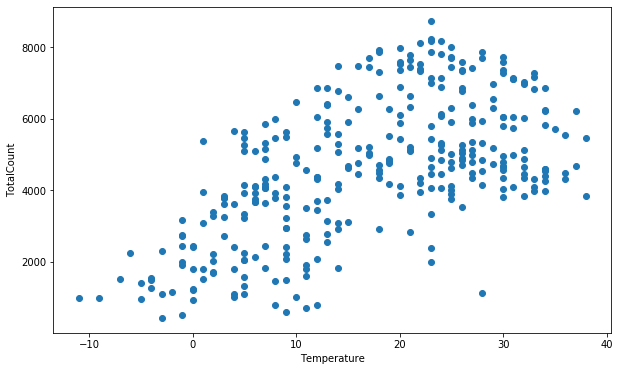

In [412]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.scatter(dfbike_train.temp, dfbike_train.TotalCount)
plt.xlabel("Temperature")
plt.ylabel("TotalCount")
plt.show()

## 2.2 [8 pts]:  Pre-process the categorical and numerical attributes in the data set
This data set contains categorical attributes with two or more categories.

### 2.2.1 [5 pts]:  Convert categorical attributes into multiple binary attributes.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required outputs
- [2 pts] Convert these categorical attributes into multiple binary attributes using one-hot encoding.
  * In place of every categorical attribute $x_j$ that has categories $1, \ldots, K_j$, introduce $K_j-1$ binary predictors $x_{j1}, \ldots, x_{j,K_j-1}$ where $x_{jk}$ is $1$ whenever $x_j = k$ and $0$ otherwise.
  * *Hint:* You may use the `pd.get_dummies` function to convert a categorical attribute in a data frame to one-hot encoding. This function creates $K$ binary columns for an attribute with $K$ categories. You should delete the last binary column generated by this function.
- [2 pts] Scale each continuous predictor to have zero mean and a standard deviation of $1$.
  * This can be done by applying the following transform to each continuous-valued predictor $j$:
    $$\hat{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}$$ where $\bar{x}_j$ and $s_j$ are the sample mean and sample standard deviation (SD) of predictor $j$ in the training set.
  * **Note:**  The reason for re-scaling is because the attributes are in different scales.
  * **We emphasize that the mean and SD values used for standardization must be estimated using only the training set observations, while the transform is applied to both the training and test sets.**
- [1 pt] Provide a table of the summary statistics of the new attributes (the `pd.describe` function will help).

**Note:** We use the term "attribute" to refer to a categorical column in the data set, and the term "predictor" to refer to the individual binary columns resulting out of one-hot encoding.

In [413]:
#season
season = pd.get_dummies(dfbike_train['season']) 
season = season.rename(columns={1.0:"Spring"})
season = season.rename(columns={2.0:"Summer"})
season = season.rename(columns={3.0:"Fall"})
season = season.rename(columns={4.0:"Winter"})
dfbike_train.insert(2,'Spring',season.Spring)
dfbike_train.insert(3,'Summer',season.Summer)
dfbike_train.insert(4,'Fall',season.Fall)
#dfbike_train.insert(5,'Winter',season.Winter)
dfbike_train.pop('season')
#month
month = pd.get_dummies(dfbike_train.month)
month = month.rename(columns={1.0:"Jan"})
month = month.rename(columns={2.0:"Feb"})
month = month.rename(columns={3.0:"Mar"})
month = month.rename(columns={4.0:"Apr"})
month = month.rename(columns={5.0:"May"})
month = month.rename(columns={6.0:"Jun"})
month = month.rename(columns={7.0:"Jul"})
month = month.rename(columns={8.0:"Aug"})
month = month.rename(columns={9.0:"Sep"})
month = month.rename(columns={10.0:"Oct"})
month = month.rename(columns={11.0:"Nov"})
month = month.rename(columns={12.0:"Dec"})
dfbike_train.insert(5,'Jan',month.Jan)
dfbike_train.insert(6,'Feb',month.Feb)
dfbike_train.insert(7,'Mar',month.Mar)
dfbike_train.insert(8,'Apr',month.Apr)
dfbike_train.insert(9,'May',month.May)
dfbike_train.insert(10,'Jun',month.Jul)
dfbike_train.insert(11,'Jul',month.Jun)
dfbike_train.insert(12,'Aug',month.Aug)
dfbike_train.insert(13,'Sep',month.Sep)
dfbike_train.insert(14,'Oct',month.Oct)
dfbike_train.insert(15,'Nov',month.Nov)
#dfbike_train.insert(16,'Dec',month.Dec)
dfbike_train.pop('month')
dfbike_train
#holiday
holiday = pd.get_dummies(dfbike_train.holiday)
holiday = holiday.rename(columns={0.0:"is_not_holiday"})
holiday = holiday.rename(columns={1.0:"is_holiday"})
#dfbike_train.insert(17,'is_not_holiday',holiday.is_not_holiday)
dfbike_train.insert(16,'is_holiday',holiday.is_holiday)
dfbike_train.pop('holiday')
#day_of_week
week = pd.get_dummies(dfbike_train.day_of_week)
week = week.rename(columns={0.0:"Sun"})
week = week.rename(columns={1.0:"Mon"})
week = week.rename(columns={2.0:"Tue"})
week = week.rename(columns={3.0:"Wed"})
week = week.rename(columns={4.0:"Thu"})
week = week.rename(columns={5.0:"Fri"})
week = week.rename(columns={6.0:"Sat"})
#dfbike_train.insert(19,'Sunday',week.Sun)
dfbike_train.insert(17,'Monday',week.Mon)
dfbike_train.insert(18,'Tuesday',week.Tue)
dfbike_train.insert(19,'Wednesday',week.Wed)
dfbike_train.insert(20,'Thursday',week.Thu)
dfbike_train.insert(21,'Friday',week.Fri)
dfbike_train.insert(22,'Saturday',week.Sat)
dfbike_train.pop('day_of_week')
#workingday
workingday = pd.get_dummies(dfbike_train.workingday) 
workingday = workingday.rename(columns={0.0:"is_not_workingday"})
workingday = workingday.rename(columns={1.0:"is_workingday"})
#dfbike_train.insert(26,'is_not_workingday',workingday.is_not_workingday)
dfbike_train.insert(23,'is_workingday',workingday.is_workingday)
dfbike_train.pop('workingday')
#weather
weather = pd.get_dummies(dfbike_train.weather)
weather = weather.rename(columns={1.0:"weather_1.0"})
weather = weather.rename(columns={2.0:"weather_2.0"})
weather = weather.rename(columns={3.0:"weather_3.0"})
#weather = weather.rename(columns={4.0:"weather_4.0"})
dfbike_train.insert(24,'weather_1.0',weather['weather_1.0'])
dfbike_train.insert(25,'weather_2.0',weather['weather_2.0'])
dfbike_train.insert(26,'weather_3.0',weather['weather_3.0'])
#dfbike_train.insert(31,'weather_4.0',weather['weather_4.0'])
a = dfbike_train.pop('weather')

In [414]:
temp_mean = dfbike_train.temp.mean()
atemp_mean = dfbike_train.atemp.mean()
humidity_mean = dfbike_train.humidity.mean()
windspeed_mean = dfbike_train.windspeed.mean()
temp_std = dfbike_train.temp.std()
atemp_std = dfbike_train.atemp.std()
humidity_std = dfbike_train.humidity.std()
windspeed_std = dfbike_train.windspeed.std()

In [415]:
#Normal
def normalize_function(the_col):
    mean = the_col.mean()
    std = the_col.std()
    the_col = the_col.apply(lambda x: (x - mean)/std)
    return the_col

In [416]:
dfbike_train.temp = normalize_function(dfbike_train.temp)
dfbike_train.atemp = normalize_function(dfbike_train.atemp)
dfbike_train.humidity = normalize_function(dfbike_train.humidity)
dfbike_train.windspeed = normalize_function(dfbike_train.windspeed)

In [417]:
dfbike_train.describe()

,Unnamed: 0,Spring,Summer,Fall,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,is_holiday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,is_workingday,weather_1.0,weather_2.0,weather_3.0,temp,atemp,humidity,windspeed,TotalCount
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,331.000000
mean,165.000000,0.217523,0.259819,0.265861,0.078550,0.066465,0.075529,0.078550,0.102719,0.093656,0.072508,0.081571,0.099698,0.090634,0.093656,0.033233,0.175227,0.135952,0.123867,0.123867,0.145015,0.135952,0.670695,0.640483,0.329305,0.030211,-3.756646e-17,-1.314826e-16,-7.888956e-16,1.502658e-16,4598.447130
std,95.695698,0.413186,0.439199,0.442459,0.269442,0.249471,0.264643,0.269442,0.304051,0.291790,0.259719,0.274124,0.300050,0.287523,0.291790,0.179515,0.380736,0.343256,0.329929,0.329929,0.352649,0.343256,0.470672,0.480585,0.470672,0.171428,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1935.319338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.503291e+00,-2.572131e+00,-2.648736e+00,-2.152869e+00,431.000000
25%,82.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.504011e-01,-8.603176e-01,-7.452412e-01,-7.381149e-01,3370.000000
50%,165.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,8.772587e-02,1.466312e-01,-6.562743e-03,-1.579037e-01,4648.000000
75%,247.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,8.024892e-01,7.508005e-01,7.055719e-01,5.693478e-01,5981.000000
max,330.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.874634e+00,1.959139e+00,2.362380e+00,2.949989e+00,8714.000000


In [418]:
#season
season_test = pd.get_dummies(dfbike_test['season']) 
season_test = season_test.rename(columns={1.0:"Spring"})
season_test = season_test.rename(columns={2.0:"Summer"})
season_test = season_test.rename(columns={3.0:"Fall"})
season_test = season_test.rename(columns={4.0:"Winter"})
dfbike_test.insert(2,'Spring',season_test.Spring)
dfbike_test.insert(3,'Summer',season_test.Summer)
dfbike_test.insert(4,'Fall',season_test.Fall)
#dfbike_test.insert(5,'Winter',season_test.Winter)
dfbike_test.pop('season')
#month
month_test = pd.get_dummies(dfbike_test.month)
month_test = month_test.rename(columns={1.0:"Jan"})
month_test = month_test.rename(columns={2.0:"Feb"})
month_test = month_test.rename(columns={3.0:"Mar"})
month_test = month_test.rename(columns={4.0:"Apr"})
month_test = month_test.rename(columns={5.0:"May"})
month_test = month_test.rename(columns={6.0:"Jun"})
month_test = month_test.rename(columns={7.0:"Jul"})
month_test = month_test.rename(columns={8.0:"Aug"})
month_test = month_test.rename(columns={9.0:"Sep"})
month_test = month_test.rename(columns={10.0:"Oct"})
month_test = month_test.rename(columns={11.0:"Nov"})
month_test = month_test.rename(columns={12.0:"Dec"})
dfbike_test.insert(5,'Jan',month_test.Jan)
dfbike_test.insert(6,'Feb',month_test.Feb)
dfbike_test.insert(7,'Mar',month_test.Mar)
dfbike_test.insert(8,'Apr',month_test.Apr)
dfbike_test.insert(9,'May',month_test.May)
dfbike_test.insert(10,'Jun',month_test.Jul)
dfbike_test.insert(11,'Jul',month_test.Jun)
dfbike_test.insert(12,'Aug',month_test.Aug)
dfbike_test.insert(13,'Sep',month_test.Sep)
dfbike_test.insert(14,'Oct',month_test.Oct)
dfbike_test.insert(15,'Nov',month_test.Nov)
#dfbike_test.insert(16,'Dec',month_test.Dec)
dfbike_test.pop('month')
#holiday
holiday_test = pd.get_dummies(dfbike_test.holiday)
holiday_test = holiday_test.rename(columns={0.0:"is_not_holiday"})
holiday_test = holiday_test.rename(columns={1.0:"is_holiday"})
#dfbike_test.insert(17,'is_not_holiday',holiday_test.is_not_holiday)
dfbike_test.insert(16,'is_holiday',holiday_test.is_holiday)
dfbike_test.pop('holiday')
#day_of_week
week_test = pd.get_dummies(dfbike_test.day_of_week)
week_test = week_test.rename(columns={0.0:"Sun"})
week_test = week_test.rename(columns={1.0:"Mon"})
week_test = week_test.rename(columns={2.0:"Tue"})
week_test = week_test.rename(columns={3.0:"Wed"})
week_test = week_test.rename(columns={4.0:"Thu"})
week_test = week_test.rename(columns={5.0:"Fri"})
week_test = week_test.rename(columns={6.0:"Sat"})
#dfbike_test.insert(17,'Sunday',week_test.Sun)
dfbike_test.insert(17,'Monday',week_test.Mon)
dfbike_test.insert(18,'Tuesday',week_test.Tue)
dfbike_test.insert(19,'Wednesday',week_test.Wed)
dfbike_test.insert(20,'Thursday',week_test.Thu)
dfbike_test.insert(21,'Friday',week_test.Fri)
dfbike_test.insert(22,'Saturday',week_test.Sat)
dfbike_test.pop('day_of_week')
#workingday
workingday_test = pd.get_dummies(dfbike_test.workingday) 
workingday_test = workingday_test.rename(columns={0.0:"is_not_workingday"})
workingday_test = workingday_test.rename(columns={1.0:"is_workingday"})
#dfbike_test.insert(26,'is_not_workingday',workingday_test.is_not_workingday)
dfbike_test.insert(23,'is_workingday',workingday_test.is_workingday)
dfbike_test.pop('workingday')
#weather
weather_test = pd.get_dummies(dfbike_test.weather)
weather_test = weather_test.rename(columns={1.0:"weather_1.0"})
weather_test = weather_test.rename(columns={2.0:"weather_2.0"})
weather_test = weather_test.rename(columns={3.0:"weather_3.0"})
weather_test = weather_test.rename(columns={4.0:"weather_4.0"})
dfbike_test.insert(24,'weather_1.0',weather_test['weather_1.0'])
dfbike_test.insert(25,'weather_2.0',weather_test['weather_2.0'])
dfbike_test.insert(26,'weather_3.0',weather_test['weather_3.0'])
#dfbike_test.insert(31,'weather_4.0',weather_test['weather_4.0'])
a = dfbike_test.pop('weather')

In [419]:
#Normal
def test_normalize_function(mean, std, the_col):
    the_col = the_col.apply(lambda x: (x - mean)/std)
    return the_col

In [420]:
dfbike_test.temp = test_normalize_function(temp_mean, temp_std, dfbike_test.temp)
dfbike_test.atemp = test_normalize_function(atemp_mean, atemp_std, dfbike_test.atemp)
dfbike_test.humidity = test_normalize_function(humidity_mean, humidity_std,dfbike_test.humidity)
dfbike_test.windspeed = test_normalize_function(windspeed_mean, windspeed_std, dfbike_test.windspeed)

In [421]:
dfbike_test.describe()

,Unnamed: 0,Spring,Summer,Fall,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,is_holiday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,is_workingday,weather_1.0,weather_2.0,weather_3.0,temp,atemp,humidity,windspeed,TotalCount
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.0000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,199.500000,0.272500,0.245000,0.250000,0.09000,0.08750,0.092500,0.085000,0.070000,0.077500,0.09000,0.08750,0.0675,0.080000,0.072500,0.02500,0.117500,0.147500,0.157500,0.157500,0.140000,0.150000,0.695000,0.627500,0.345000,0.02750,-0.128713,-0.121217,-0.076029,-0.008111,4514.21250
std,115.614301,0.445803,0.430626,0.433555,0.28654,0.28292,0.290093,0.279231,0.255467,0.267718,0.28654,0.28292,0.2512,0.271633,0.259639,0.15632,0.322418,0.355048,0.364728,0.364728,0.347422,0.357519,0.460984,0.484076,0.475964,0.16374,1.052309,1.061183,0.988182,0.983825,2092.60635
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-2.324601,-2.370741,-4.421814,-1.858750,22.00000
25%,99.750000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.073765,-1.061707,-0.879771,-0.714163,2875.25000
50%,199.500000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,-0.180310,-0.155453,-0.092312,-0.098286,4516.00000
75%,299.250000,1.000000,0.000000,0.250000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.802489,0.851495,0.665606,0.534842,6174.75000
max,399.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.963980,2.261224,2.202511,4.046877,10045.00000


### 2.2.2 [3 pts]: Discussion questions
1. [1 pt] Why can't the categorical attributes be directly used as predictors?

   * If we use a categorical attribute to represent all the possible values of a predictor, it may be intuitive for us humans but not for machines. Different numbers represent only categories, using the symbolic property of numbers; but especially when referring to machines to fit the model, different weights are introduced because the machine calls the numeric property of the number. For example, we use the attribute $s$ to represent the season, $s_k$ is its coefficient. We use $1$ for spring, $2$ for summer, and so on. Then in the model, for the same coefficient $s_k$, under the influence of spring and winter, it will appear two different values, $1*s_k$ and $4*s_k$, which may have a bad effect on the prediction results.
  
  
2. [1 pt] Why is it okay to not have a binary column for the $K_j$-th category?

   * Because for a categorical attribute, all of its possible values are finite and independent and can be represented. So for k possible cases under a certain attribute, we use $0$ and $1$ respectively to indicate that the $1^{st}$, $2^{nd}$, ... , $(k-1)^{th}$ case does not occur or occurs. Then, the $k^{th}$ case means the former $k-1$ cases do not occur, so k-1 attributes are sufficient.
  
  
3. [1 pt] Why shouldn't we include the test set observations in computing the mean and SD?

   * We can discuss this issue in two condition. First, if all the data, including the training set and the test set, are calculated and then normalized by its mean, after splitting into the training set and the test set, the mean of the training set cannot be guaranteed to be $0$, the standard deviation nor can it be guaranteed to be $1$. Secondly, if, in the standardized test set, we use the mean and standard deviation of the test set, then the standardized test set mean will be $0$, the standard deviation is $1$, the result is that when applying the model, the data size is wrong. For example, the maximum value of the training set is $100$, the normalization is $1$, and the maximum value of the test set is $200$, which is $1.5$ according to the normalization rule of the training set, and $1$ if the standardization rule of the test set is used. However, the model at this time will treat $1$ as $100$ instead of $200$, which will cause errors. The standardized rules of the training set are more suitable for the model.
  

## 2.3 [11 pts] :  Fit a multiple linear regression model

### 2.3.1 [5 pts]:  Fit a multiple linear regression model to the training set.
Use the `statsmodels` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- [1 pt] Report the $R^2$ score on the test set.
  - *Note:  Don't worry if the $R^{2}$ score is not very good.*
- [2 pts] Find out which of the estimated coefficients are statistically significant at a significance level of $5\%$ ($p$-value $<0.05$).
  - **Hint:  Use a $t-$ test.**
- [2 pts] Make a plot of residuals of the fitted model ${e} = y - \hat{y}$ as a function of the predicted value $\hat{y}$. Draw a horizontal line denoting the zero residual value on the $Y$-axis.

In [422]:
dfbike_train.columns

Index(['Unnamed: 0', 'Spring', 'Summer', 'Fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'is_holiday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'is_workingday', 'weather_1.0', 'weather_2.0', 'weather_3.0', 'temp', 'atemp', 'humidity', 'windspeed', 'TotalCount'], dtype='object')

In [423]:
dfbike_test.columns

Index(['Unnamed: 0', 'Spring', 'Summer', 'Fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'is_holiday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'is_workingday', 'weather_1.0', 'weather_2.0', 'weather_3.0', 'temp', 'atemp', 'humidity', 'windspeed', 'TotalCount'], dtype='object')

In [424]:
# Split predictors from response
# Training
x_train = dfbike_train[['Spring', 'Summer', 'Fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'is_holiday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'is_workingday', 'weather_1.0', 'weather_2.0', 'weather_3.0', 'temp', 'atemp', 'humidity', 'windspeed']]
y_train = dfbike_train.TotalCount   
#Testing
#x_test = dfbike_test[['Spring', 'Summer', 'Fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'is_holiday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'is_workingday', 'weather_1.0', 'weather_2.0', 'weather_3.0', 'temp', 'atemp', 'humidity', 'windspeed']]
x_test = dfbike_test[['Spring', 'Summer', 'Fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'is_holiday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'is_workingday', 'weather_1.0', 'weather_2.0', 'weather_3.0', 'temp', 'atemp', 'humidity', 'windspeed']]
y_test = dfbike_test.TotalCount 

In [425]:
# Add column of ones to x matrix
xtrain_vals = sm.add_constant(x_train.values)
ytrain_vals = y_train.values
xtest_vals = sm.add_constant(x_test.values)
ytest_vals = y_test.values
# Create model for linear regression
model = sm.OLS(ytrain_vals, xtrain_vals)
# Fit model
fitted_model = model.fit()
a = fitted_model.summary()
a

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     15.25
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           6.56e-42
Time:                        13:43:35   Log-Likelihood:                -2832.1
No. Observations:                 331   AIC:                             5720.
Df Residuals:                     303   BIC:                             5827.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3192.2092    338.813      9.422      0.000    2525.486    3858.933
x1         -1226.1865    506.763     -2.420      0.016   -2223.407    -228.966
x2          -327.3575    573.373     -0.571      0.568   -1455.654     800.939
x3          -193.3050    449.171     -0.430      0.667   -1077.194     690.584
x4           118.8358    505.353      0.235      0.814    -875.611    1113.282
x5           207.7759    516.216      0.402      0.688    -808.047    1223.599
x6           358.0167    511.391      0.700      0.484    -648.310    1364.344
x7           452.1849    657.792      0.687      0.492    -842.234    1746.604
x8            53.0233    700.991      0.076      0.940   -1326.403    1432.450
x9         -1161.1512    701.261     -1.656      0.099   -2541.109     218.806
x10         -673.4271    696.142     -0.967      0.334   -2043.313     696.458
x11         -657.6397    684.628     -0.961      0.338   -2004.868     689.588
x12          523.9804    548.284      0.956      0.340    -554.945    1602.906
x13          605.0867    439.844      1.376      0.170    -260.449    1470.623
x14          231.5175    413.966      0.559      0.576    -583.094    1046.129
x15         -284.3563    398.982     -0.713      0.477   -1069.483     500.770
x16         -123.7515    170.981     -0.724      0.470    -460.212     212.709
x17         -195.2859    203.703     -0.959      0.338    -596.137     205.565
x18          170.5113    213.789      0.798      0.426    -250.187     591.210
x19           61.2560    206.213      0.297      0.767    -344.536     467.048
x20          111.0669    198.877      0.558      0.577    -280.288     502.422
x21          465.1450    269.154      1.728      0.085     -64.504     994.794
x22          308.1531    165.413      1.863      0.063     -17.351     633.657
x23         1596.9180    198.428      8.048      0.000    1206.446    1987.390
x24         1580.3514    183.091      8.631      0.000    1220.060    1940.643
x25           14.9397    386.998      0.039      0.969    -746.605     776.485
x26          925.7338    474.536      1.951      0.052      -8.070    1859.538
x27          312.4341    429.987      0.727      0.468    -533.705    1158.573
x28         -548.4929    113.200     -4.845      0.000    -771.251    -325.735
x29         -255.1226     80.766     -3.159      0.002    -414.057     -96.189
==============================================================================
Omnibus:                       28.947   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.753
Skew:                           0.054   Prob(JB):                      0.00762
Kurtosis:                       2.166   Cond. No.                     1.08e+16
==============================================================================

W

In [426]:
def multiple_linear_regression_score(x_test, y_test):
    # Compute predicted labels
    y_pred = fitted_model.predict(xtest_vals)
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1.0 - sq_error / y_variance

    return r_squared, y_pred

In [427]:
r_2,predicted_y = multiple_linear_regression_score(x_test, y_test)
print("The R square is:",r_2)

The R square is: 0.24934211146527596


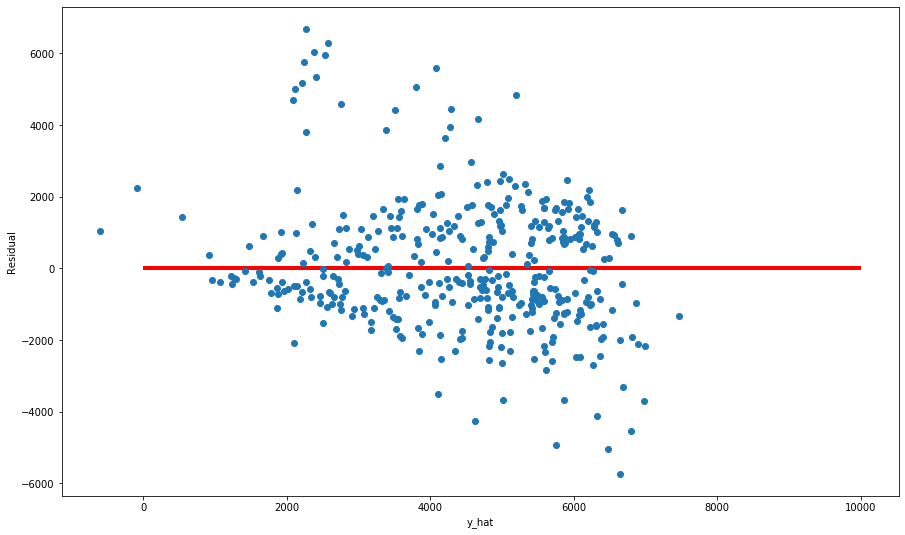

In [429]:
e = ytest_vals-predicted_y
fig,ax=plt.subplots(1,1,figsize=(15,9))
plt.plot(predicted_y,e,'o',ms=6)
plt.hlines(0, 0, 10000, colors = "r",linewidth=4,linestyles = "-")
plt.xlabel("y_hat")
plt.ylabel("Residual")
plt.show()

### 2.3.2 [6 pts]: Discuss your results by answering the following questions.  
You should answer the questions directly in this cell of your notebook right after each question.

1. [1 pt] Which among the predictors have a positive correlation with the number of bike rentals?

   * 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Sep', 'Oct', 'Nov', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'is_workingday', 'weather_1.0', 'weather_2.0', 'weather_3.0', 'temp', 'atemp'.
   
  
2. [1 pt] Does the day of week have a relationship with bike rentals?

   * It seems the rentals on weekend are higher than weekday, for the coef is about $400$ while others are less than $120$.
   
  
3. [1 pt] What effect does a holiday have on bike rentals?

   * Bike rentals will be lower on a holiday for the coef of is_holiday is about  $-284$.
   
  
4. [1 pt] Is there a difference in the coefficients assigned to `temp` and `atemp`? Give an explanation for your observation.

   * Yes, for the coef of temp is about $925$ but $312$ for atemp. On my opinion, it may be because the apparent temperature is also affected by factors such as wind speed and humidity.
   
  
5. [1 pt] Does the plot of $e$ reveal a non-linear relationship between the predictors and response?

   * Yes.
  
  
6. [1 pt] What does the plot of $e$ convey about the variance of the error terms?

   * The more scatter points in the graph deviate from the red line, the greater the difference. 
  